In [1]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn

In [2]:
imagename_label = pd.read_csv("../data/processed/image_name_label.csv")
display(imagename_label.head())

,image,name,label
0,3653610.jpg,安,151
1,3655161.jpg,安,151
2,3655689.jpg,安,151
3,3655818.jpg,八,237
4,3656106.jpg,八,237


In [3]:
label2name_frame = pd.read_csv("../data/processed/label_name.csv")
class_number = len(label2name_frame)
print('Total class number is {}'.format(class_number))
label2name_frame

Total class number is 793


,label,name
0,0,子
1,1,合
2,2,酉
3,3,莫
4,4,朿
...,...,...
788,788,民
789,789,免
790,790,麋
791,791,尨


In [4]:
id2name = area_dict = dict(zip(label2name_frame.label, label2name_frame.name))
id2name

{0: '子',
 1: '合',
 2: '酉',
 3: '莫',
 4: '朿',
 5: '执',
 6: '戌',
 7: '戊',
 8: '丙',
 9: '辰',
 10: '疐',
 11: '老',
 12: '庚',
 13: '疋',
 14: '束',
 15: '卢',
 16: '毓',
 17: '壶',
 18: '商',
 19: '雨',
 20: '匜',
 21: '未',
 22: '鬲',
 23: '韦',
 24: '保',
 25: '中',
 26: '梦',
 27: '史',
 28: '咙',
 29: '车',
 30: '眢',
 31: '丁',
 32: '疾',
 33: '帚',
 34: '耤',
 35: '危',
 36: '齿',
 37: '示',
 38: '奭',
 39: '丰',
 40: '亥',
 41: '寅',
 42: '羌',
 43: '宜',
 44: '橐',
 45: '风',
 46: '龠',
 47: '丘',
 48: '巳',
 49: '并',
 50: '鸟',
 51: '祝',
 52: '西',
 53: '贮',
 54: '永',
 55: '襄',
 56: '戚',
 57: '袁',
 58: '黹',
 59: '我',
 60: '雇',
 61: '毌',
 62: '萑',
 63: '典',
 64: '泉',
 65: '封',
 66: '龟',
 67: '者',
 68: '贞',
 69: '午',
 70: '美',
 71: '乃',
 72: '寻',
 73: '舞',
 74: '郁',
 75: '焚',
 76: '奚',
 77: '方',
 78: '戠',
 79: '鸡',
 80: '辛',
 81: '晶',
 82: '宿',
 83: '呈',
 84: '王',
 85: '黍',
 86: '朝',
 87: '饮',
 88: '雝',
 89: '壴',
 90: '九',
 91: '爵',
 92: '矢',
 93: '六',
 94: '仓',
 95: '亳',
 96: '首',
 97: '土',
 98: '洀',
 99: '雷',
 100: '良',

In [5]:
# defining the model architecture
# import torch.nn as nn
# class Net(nn.Module):   
#   def __init__(self, class_number):
#       super(Net, self).__init__()
#       self.cnn_layers = nn.Sequential(
#           # Defining a 2D convolution layer
#           nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
#           nn.BatchNorm2d(4),
#           nn.ReLU(inplace=True),
#           nn.MaxPool2d(kernel_size=2, stride=2),
#           # Defining another 2D convolution layer
#           nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
#           nn.BatchNorm2d(4),
#           nn.ReLU(inplace=True),
#           nn.MaxPool2d(kernel_size=2, stride=2),
#       )
#       self.linear_layers = nn.Sequential(
#           nn.Linear(4 * 7 * 7, class_number)
#       )

#   # Defining the forward pass    
#   def forward(self, x):
#       x = self.cnn_layers(x)
#       x = x.view(x.size(0), -1)
#       x = self.linear_layers(x)
#       return x

# class Net(nn.Module):   
#   def __init__(self, class_number):
#       super(Net, self).__init__()
#       self.cnn_layers = nn.Sequential(
#           # Defining a 2D convolution layer
#           nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
#           nn.BatchNorm2d(4),
#           nn.ReLU(inplace=True),
#           nn.MaxPool2d(kernel_size=2, stride=2), # a. half-of-size
#           # Defining another 2D convolution layer
#           nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
#           nn.BatchNorm2d(4),
#           nn.ReLU(inplace=True),
#           nn.MaxPool2d(kernel_size=2, stride=2), # a. half-of-size
#       )
#       self.linear_layers = nn.Sequential(
#           nn.Linear(4 * 12 * 12, class_number)
#       )

#   # Defining the forward pass    
#   def forward(self, x):
#       x = self.cnn_layers(x)
#       x = x.view(x.size(0), -1)
#       x = self.linear_layers(x)
#       return x

class Net(nn.Module):   
  def __init__(self, class_number):
      super(Net, self).__init__()
      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 32, kernel_size=5, stride=2, padding=2),
          nn.BatchNorm2d(32),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2), # a. half-of-size
          
          # Defining another 2D convolution layer
          nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2), # a. half-of-size
      )
      self.linear_layers = nn.Sequential(
          nn.Linear(64 * 5 * 5, class_number), # 793 
        #   nn.Linear(800, class_number) #  
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x


PATH = 'model_best'
model = Net(class_number)
model.load_state_dict(torch.load(PATH))
# model = torch.load('model_ConvNetCls48x48.pth')

<All keys matched successfully>

In [6]:
model

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1600, out_features=793, bias=True)
  )
)

In [7]:
# load image 
from skimage import io, transform
image_raw = np.load('../src/ui/test.npy')
image_raw = image_raw[:, :, 0]
image = transform.resize(image_raw, (40, 40))
image = image.reshape(1, 1, image.shape[0], image.shape[1])
image = torch.from_numpy(image).float()
# plt.imshow(image)
print(image.shape, image.dtype)

torch.Size([1, 1, 40, 40]) torch.float32


In [8]:
model.eval()
pred = model(image)
pred_label = pred.argmax(1).item()
print("\nPredicted Label =", pred_label)
print("\nChinese Character Label =", id2name[pred_label])


Predicted Label = 302

Chinese Character Label = 月


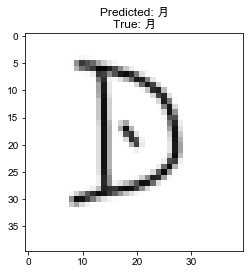

In [9]:
from matplotlib.pylab import plt
plt.rcParams['font.family'] = 'Arial Unicode MS' # enable chinese character
title = 'Predicted: {}\nTrue: {}'.format(id2name[pred_label], id2name[pred_label])
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(title)
plt.show()

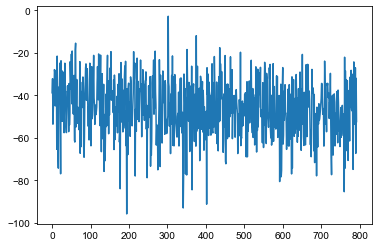

In [10]:
prob_dist = pred.detach().numpy().squeeze()
plt.plot(prob_dist)

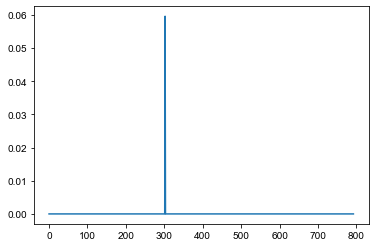

In [11]:
prob_dist = torch.sigmoid(pred).detach().numpy()[0]
plt.plot(prob_dist)

In [12]:
pd.options.display.float_format = '{:,.4f}'.format
prediction_top_10 = label2name_frame.copy()
prediction_top_10['prob'] = prob_dist
prediction_top_10 = prediction_top_10.sort_values(by='prob', ascending=False).head(10)
prediction_top_10 

,label,name,prob
302,302,月,0.0596
375,375,豭,0.0000
61,61,毌,0.0000
436,436,屯,0.0000
351,351,叉,0.0000
60,60,雇,0.0000
52,52,西,0.0000
268,268,夕,0.0000
153,153,豕,0.0000
212,212,石,0.0000


In [13]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from obs.make_dataset import create_dataloader, show_oracle_character

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
plt.ion()   # interactive mode

csv_file="../data/processed/image_name_label.csv"
root_dir='../data/raw/image/'


dataloader, dataset = create_dataloader(csv_file, root_dir, batch_size=64, rescale_size=50, randomcrop_size=40)


In [14]:
df_select_original = imagename_label[imagename_label.label==pred_label]         
display(df_select_original)

,image,name,label
1408,4904543.jpg,月,302
1409,4905528.jpg,月,302


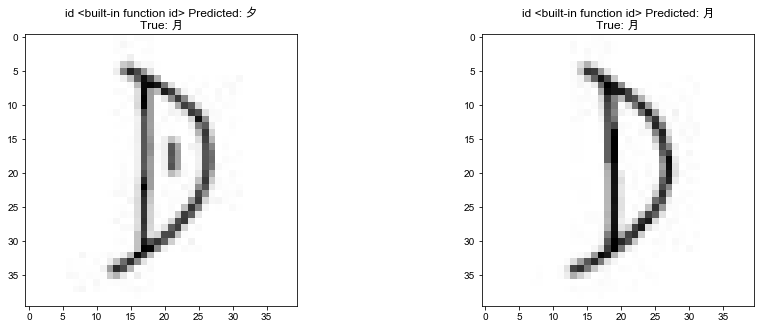

In [15]:
fig, axs = plt.subplots(1, len(df_select_original), figsize=(15, 5))
for i in range(len(df_select_original)):

    sample = df_select_original.iloc[i] 
    image = sample['image']
    label = sample['label']
    name = sample['name']
    img = io.imread('../data/raw/image/'+image)

    image_raw = img[:, :, 0]
    image = transform.resize(image_raw, (40, 40))
    image = image.reshape(1, 1, image.shape[0], image.shape[1])
    image = torch.from_numpy(image).float()
    model.eval()
    pred = model(image)
    pred_label = pred.argmax(dim=1).item()
    # pred.shape, 
    # print(pred.shape)
    # print(pred.argmax(dim=1))
    # pred_label, label.item(), name
    title = 'id {} Predicted: {}\nTrue: {}'.format(id, id2name[pred_label], id2name[label.item()])
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].set_title(title)
plt.show()

In [16]:
correct_count, all_count = 0, 0
for data in dataloader:
    images = data['image'].float()
    labels = data['label'].long()
    for i in range(len(labels)):
        # img = images[i].view(1, 1, 28, 28)
        img = images[i,:,:,:]
        img = torch.unsqueeze(img, dim=0)
        with torch.no_grad():
            logps = model(img)
        # ps = torch.exp(logps)
        # probab = list(ps.cpu()[0])
        pred_label = logps.argmax(1).item()
        true_label = labels.cpu()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images = 1602

Model Accuracy = 0.99812734082397


In [17]:
from translate import Translator
translator= Translator(to_lang="zh")
translation = translator.translate("This is a pen.")
print(translation)

这是一支笔


In [18]:
translator= Translator(from_lang="zh-cn", to_lang="en")
translation = translator.translate("我是一只猫")
print(translation)

translation = translator.translate("戎")
print(translation)

I'm a cat.
[しん]/(n)


In [19]:
type(translation), translation 


(str, '[しん]/(n)')

In [20]:
# from translate import Translator
# to_lang = 'zh'
# secret = '<your secret from Microsoft or DeepL>'
# translator = Translator(provider='<the name of the provider, eg. microsoft or deepl>', to_lang=to_lang, secret_access_key=secret)
# translator.translate('the book is on the table')
# # O'碗是在桌子上。'